In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [9]:
data_path = '../data/'
filelst = os.listdir(data_path)
df = pd.DataFrame()
for file in filelst:
    if '가뭄지수' in file:
        df = pd.concat([df,pd.read_csv(data_path+file, encoding='cp949')])
df

,지점,지점명,일시,SPI1,SPI2,SPI3,SPI4,SPI5,SPI6,SPI9,SPI12,SPI18,SPI24
0,105,강릉,1991-01-02,0.038,0.146,0.585,1.716,1.256,0.804,0.921,1.460,1.497,1.562
1,105,강릉,1991-01-03,0.016,0.122,0.588,1.756,1.263,0.838,0.923,1.462,1.434,1.533
2,105,강릉,1991-01-04,0.023,0.053,0.617,1.785,1.285,0.852,0.925,1.480,1.459,1.535
3,105,강릉,1991-01-05,0.032,0.065,0.634,1.903,1.332,0.861,0.930,1.482,1.469,1.494
4,105,강릉,1991-01-06,0.090,0.022,0.646,1.935,1.348,0.890,0.948,1.441,1.474,1.494
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,184,제주,2021-12-27,-0.120,-0.310,-0.470,0.770,1.220,0.540,0.380,0.510,0.170,0.150
3281,184,제주,2021-12-28,-0.100,-0.320,-0.440,0.820,1.240,0.560,0.370,0.470,0.190,0.150
3282,184,제주,2021-12-29,-0.080,-0.320,-0.420,0.920,1.240,0.590,0.360,0.470,0.200,0.150
3283,184,제주,2021-12-30,-0.070,-0.330,-0.530,0.960,1.240,0.600,0.370,0.460,0.170,0.130


In [10]:
spi = df[df['지점명']=='서울'].drop(['지점명','지점'],axis=1)
#spi = df.drop(['지점명','지점'],axis=1).groupby('일시').mean()

In [11]:
dat = pd.DataFrame({'일시':np.arange(dt.datetime(1996,1,1),dt.datetime(2022,1,1),dt.timedelta(days=1))}).astype('str')
spi = pd.merge(dat,spi,how='left',on='일시')
spi = spi.interpolate()
spi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9497 entries, 0 to 9496
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      9497 non-null   object 
 1   SPI1    9497 non-null   float64
 2   SPI2    9497 non-null   float64
 3   SPI3    9497 non-null   float64
 4   SPI4    9497 non-null   float64
 5   SPI5    9497 non-null   float64
 6   SPI6    9497 non-null   float64
 7   SPI9    9497 non-null   float64
 8   SPI12   9497 non-null   float64
 9   SPI18   9497 non-null   float64
 10  SPI24   9497 non-null   float64
dtypes: float64(10), object(1)
memory usage: 890.3+ KB


In [12]:
spi['target'] = np.where(spi['SPI3']<-1.5,1,0)

In [13]:
spi['mtag']=spi['target'].shift(-180)

In [14]:
filepath = '../data/preprocessed_data/'

In [15]:
df['지점명'].unique()

array(['강릉', '서울', '청주', '대전', '대구', '전주', '광주', '부산', '제주'], dtype=object)

In [16]:
dat_lst = os.listdir(filepath)
dat_lst

['preprocessed_고층기후데이터.csv',
 'preprocessed_주변국 기상데이터_199601to202108.csv',
 'preprocessed_주변국 기상데이터_중국 부분 제거.csv',
 '국내_바다.csv',
 '국내기후(백령도제외).csv']

In [17]:
climate_kor = pd.read_csv(filepath+dat_lst[4],index_col=0)
climate_kor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93504 entries, 0 to 11687
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시간           93504 non-null  object 
 1   관측지점         93504 non-null  object 
 2   평균 기온        93504 non-null  float64
 3   최저 기온        93504 non-null  float64
 4   최고 기온        93504 non-null  float64
 5   1시간 최다강수량    93504 non-null  float64
 6   일강수량         93504 non-null  float64
 7   최대 순간풍속      93504 non-null  float64
 8   최대 순간 풍속 풍향  93504 non-null  float64
 9   최대 풍속        93504 non-null  float64
 10  최대 풍속 풍향     93504 non-null  float64
 11  평균 풍속        93504 non-null  float64
 12  풍정합          93504 non-null  float64
 13  최대 풍향        93504 non-null  float64
 14  평균 이슬점온도     93504 non-null  float64
 15  평균 상대습도      93504 non-null  float64
 16  평균 증기압       93504 non-null  float64
 17  평균 현지기압      93504 non-null  float64
 18  최고 해면 기압     93504 non-null  float64
 19  최저 해

In [18]:
# 서울 데이터만 활용
cli_seoul = pd.merge(dat,climate_kor[climate_kor['관측지점'] == '서울'].drop('관측지점',axis=1).rename({'시간':'일시'},axis=1),how='left',on='일시')

In [19]:
# 고도 데이터 합치기
climate_high = pd.read_csv(filepath+dat_lst[0])
climate_high = pd.merge(dat,climate_high,how='left',on='일시')
cli_seoul = pd.concat([cli_seoul,climate_high.drop('일시',axis=1)], axis=1)
climate_high

,일시,50hPa_고도,50hPa_기온,50hPa_이슬점,50hPa_풍향,50hPa_풍속,70hPa_고도,70hPa_기온,70hPa_이슬점,70hPa_풍향,...,925hPa_고도,925hPa_기온,925hPa_이슬점,925hPa_풍향,925hPa_풍속,1000hPa_고도,1000hPa_기온,1000hPa_이슬점,1000hPa_풍향,1000hPa_풍속
0,1996-01-01,20385.00,-59.300,-67.800,268.750,43.625,18290.00,-61.150,-69.40,266.250,...,798.75,-5.600,-13.300,307.50,13.75,185.50,-3.850,-15.850,297.50,6.75
1,1996-01-02,20392.50,-54.850,-64.850,265.625,33.625,18257.50,-59.650,-68.15,257.500,...,757.75,-1.225,-4.175,246.25,18.25,132.00,1.875,-3.400,221.25,9.75
2,1996-01-03,20396.25,-54.000,-63.625,262.500,39.625,18231.25,-54.250,-63.50,266.250,...,790.00,-12.750,-18.725,303.75,24.25,191.75,-8.150,-17.400,308.75,14.75
3,1996-01-04,20465.00,-52.450,-62.450,279.375,19.750,18316.25,-55.075,-63.70,272.500,...,809.75,-8.700,-11.200,271.25,12.25,201.75,-5.600,-14.100,207.50,5.75
4,1996-01-05,20492.50,-51.450,-64.950,197.500,17.750,18332.50,-55.150,-67.15,242.500,...,791.00,2.500,1.975,237.50,12.25,161.50,0.575,-2.675,196.25,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9492,2021-12-27,20457.50,-58.450,-89.200,270.000,37.000,18337.50,-56.250,-87.75,266.250,...,852.00,-7.500,-10.850,293.75,26.00,243.75,-6.150,-11.050,220.00,3.50
9493,2021-12-28,20442.50,-59.350,-89.850,277.500,48.250,18325.00,-57.750,-88.50,278.750,...,837.00,-3.050,-6.200,257.50,17.00,215.25,-0.850,-4.725,161.25,6.00
9494,2021-12-29,20485.00,-58.025,-89.025,241.875,30.625,18333.75,-58.000,-89.00,265.000,...,789.25,-3.450,-6.825,272.50,25.00,167.00,0.825,-4.800,266.25,14.75
9495,2021-12-30,20480.00,-59.625,-89.875,228.125,32.125,18332.50,-54.725,-86.35,273.125,...,821.25,-9.900,-17.550,312.50,21.25,213.75,-4.550,-14.550,307.50,14.00


In [20]:
# 일시 제거
cli_seoul.drop('일시',axis=1,inplace=True)

In [21]:
# 
days=7
cli_window = cli_seoul
for i in range(1,days+1):
    tmp = cli_seoul.shift(i)
    tmp.columns += str(i)
    cli_window = pd.concat([cli_window,tmp],axis=1)
cli_window

,평균 기온,최저 기온,최고 기온,1시간 최다강수량,일강수량,최대 순간풍속,최대 순간 풍속 풍향,최대 풍속,최대 풍속 풍향,평균 풍속,...,925hPa_고도7,925hPa_기온7,925hPa_이슬점7,925hPa_풍향7,925hPa_풍속7,1000hPa_고도7,1000hPa_기온7,1000hPa_이슬점7,1000hPa_풍향7,1000hPa_풍속7
0,-3.2,-7.9,2.5,0.0,0.0,6.0,340.0,3.5,290.0,1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.2,-3.9,3.9,0.0,0.0,9.3,230.0,3.8,230.0,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-4.5,-8.5,5.5,0.0,0.0,17.5,270.0,8.2,290.0,5.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-5.4,-10.7,-0.1,0.0,0.0,7.1,270.0,3.5,270.0,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.1,-2.1,2.0,0.0,2.0,7.8,70.0,3.7,70.0,2.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9492,-7.6,-12.9,-3.9,0.0,0.0,5.5,340.0,3.1,20.0,1.7,...,780.25,3.250,0.875,251.25,23.00,141.50,7.300,3.40,215.00,10.25
9493,-4.1,-8.5,-0.9,0.0,0.0,4.9,50.0,3.1,50.0,2.2,...,787.00,2.250,-8.125,310.00,13.25,154.50,5.000,-3.10,283.75,10.00
9494,0.4,-3.8,5.9,0.0,0.2,10.8,270.0,5.9,270.0,2.6,...,818.75,1.700,-19.050,336.25,9.25,190.75,2.075,-7.05,226.25,4.25
9495,-3.9,-6.8,0.2,0.0,0.0,12.3,320.0,6.6,290.0,3.3,...,830.75,0.050,-10.200,196.25,5.25,201.50,4.100,-6.40,200.00,3.50


In [22]:
cli_window = pd.concat([cli_window,spi['target']],axis=1)
cli_window['mtag'] = cli_window['target'].shift(-15)
cli_window

,평균 기온,최저 기온,최고 기온,1시간 최다강수량,일강수량,최대 순간풍속,최대 순간 풍속 풍향,최대 풍속,최대 풍속 풍향,평균 풍속,...,925hPa_이슬점7,925hPa_풍향7,925hPa_풍속7,1000hPa_고도7,1000hPa_기온7,1000hPa_이슬점7,1000hPa_풍향7,1000hPa_풍속7,target,mtag
0,-3.2,-7.9,2.5,0.0,0.0,6.0,340.0,3.5,290.0,1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
1,0.2,-3.9,3.9,0.0,0.0,9.3,230.0,3.8,230.0,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
2,-4.5,-8.5,5.5,0.0,0.0,17.5,270.0,8.2,290.0,5.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
3,-5.4,-10.7,-0.1,0.0,0.0,7.1,270.0,3.5,270.0,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
4,-0.1,-2.1,2.0,0.0,2.0,7.8,70.0,3.7,70.0,2.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9492,-7.6,-12.9,-3.9,0.0,0.0,5.5,340.0,3.1,20.0,1.7,...,0.875,251.25,23.00,141.50,7.300,3.40,215.00,10.25,0,NaN
9493,-4.1,-8.5,-0.9,0.0,0.0,4.9,50.0,3.1,50.0,2.2,...,-8.125,310.00,13.25,154.50,5.000,-3.10,283.75,10.00,0,NaN
9494,0.4,-3.8,5.9,0.0,0.2,10.8,270.0,5.9,270.0,2.6,...,-19.050,336.25,9.25,190.75,2.075,-7.05,226.25,4.25,0,NaN
9495,-3.9,-6.8,0.2,0.0,0.0,12.3,320.0,6.6,290.0,3.3,...,-10.200,196.25,5.25,201.50,4.100,-6.40,200.00,3.50,0,NaN


In [23]:
cli_seoul = pd.concat([cli_seoul,spi['target']],axis=1)
cli_seoul['mtag'] = cli_seoul['target'].shift(-15)
cli_seoul

,평균 기온,최저 기온,최고 기온,1시간 최다강수량,일강수량,최대 순간풍속,최대 순간 풍속 풍향,최대 풍속,최대 풍속 풍향,평균 풍속,...,925hPa_이슬점,925hPa_풍향,925hPa_풍속,1000hPa_고도,1000hPa_기온,1000hPa_이슬점,1000hPa_풍향,1000hPa_풍속,target,mtag
0,-3.2,-7.9,2.5,0.0,0.0,6.0,340.0,3.5,290.0,1.6,...,-13.300,307.50,13.75,185.50,-3.850,-15.850,297.50,6.75,0,0.0
1,0.2,-3.9,3.9,0.0,0.0,9.3,230.0,3.8,230.0,1.8,...,-4.175,246.25,18.25,132.00,1.875,-3.400,221.25,9.75,0,0.0
2,-4.5,-8.5,5.5,0.0,0.0,17.5,270.0,8.2,290.0,5.3,...,-18.725,303.75,24.25,191.75,-8.150,-17.400,308.75,14.75,0,0.0
3,-5.4,-10.7,-0.1,0.0,0.0,7.1,270.0,3.5,270.0,1.2,...,-11.200,271.25,12.25,201.75,-5.600,-14.100,207.50,5.75,0,0.0
4,-0.1,-2.1,2.0,0.0,2.0,7.8,70.0,3.7,70.0,2.4,...,1.975,237.50,12.25,161.50,0.575,-2.675,196.25,6.50,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9492,-7.6,-12.9,-3.9,0.0,0.0,5.5,340.0,3.1,20.0,1.7,...,-10.850,293.75,26.00,243.75,-6.150,-11.050,220.00,3.50,0,NaN
9493,-4.1,-8.5,-0.9,0.0,0.0,4.9,50.0,3.1,50.0,2.2,...,-6.200,257.50,17.00,215.25,-0.850,-4.725,161.25,6.00,0,NaN
9494,0.4,-3.8,5.9,0.0,0.2,10.8,270.0,5.9,270.0,2.6,...,-6.825,272.50,25.00,167.00,0.825,-4.800,266.25,14.75,0,NaN
9495,-3.9,-6.8,0.2,0.0,0.0,12.3,320.0,6.6,290.0,3.3,...,-17.550,312.50,21.25,213.75,-4.550,-14.550,307.50,14.00,0,NaN


In [24]:
x = cli_seoul.dropna().drop(['mtag','target'],axis=1)
y = cli_seoul.dropna()['mtag']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, stratify=y, random_state=111)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=111)

[0]	validation_0-auc:0.63261	validation_1-auc:0.57479
[2]	validation_0-auc:0.81737	validation_1-auc:0.66834
[4]	validation_0-auc:0.89744	validation_1-auc:0.68868
[6]	validation_0-auc:0.94274	validation_1-auc:0.70694
[8]	validation_0-auc:0.95867	validation_1-auc:0.71269
[10]	validation_0-auc:0.97669	validation_1-auc:0.71991
[12]	validation_0-auc:0.98584	validation_1-auc:0.72071
[14]	validation_0-auc:0.98796	validation_1-auc:0.72607
[16]	validation_0-auc:0.99230	validation_1-auc:0.73784
[18]	validation_0-auc:0.99550	validation_1-auc:0.75315
[20]	validation_0-auc:0.99702	validation_1-auc:0.75262
[22]	validation_0-auc:0.99789	validation_1-auc:0.74969
[23]	validation_0-auc:0.99820	validation_1-auc:0.75169
auc: 0.7792237117322686
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1753
         1.0       0.40      0.04      0.08       144

    accuracy                           0.92      1897
   macro avg       0.66      0.52      0.52     

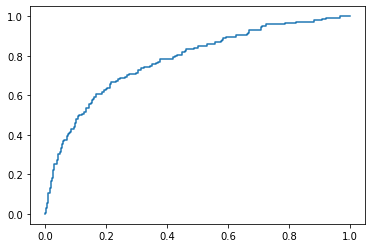

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import train_test_split

xgb = XGBClassifier(
#                     n_estimators=1000,
#                     max_depth = 9,
#                     learning_rate = 0.01,
#                     gamma = 1,
                   )
xgb.fit(x_train, y_train, 
        eval_metric='auc', 
        eval_set=[(x_train,y_train),(x_val,y_val)], 
        early_stopping_rounds=5,
        verbose=2)
pred = xgb.predict(x_test)
prob = xgb.predict_proba(x_test)

print('auc:',roc_auc_score(y_test, prob[:,1]))
print(classification_report(y_test,pred))
tpr, fpr, _ = roc_curve(y_test, prob[:,1])
plt.plot(tpr,fpr)


In [29]:
fi = pd.Series( xgb.feature_importances_,x.columns).sort_values(ascending=False)
fi

50hPa_고도       0.020611
70hPa_고도       0.019471
1000hPa_이슬점    0.019168
70hPa_풍속       0.018508
최저 해면기압        0.015651
                 ...   
150hPa_풍속      0.005192
925hPa_기온      0.004048
합계 3시간 신적설     0.000000
안개 계속 시간       0.000000
1시간 최다강수량      0.000000
Length: 96, dtype: float32

In [37]:
x = cli_window.dropna().drop(['mtag','target'],axis=1)
y = cli_window.dropna()['mtag']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, stratify=y, random_state=111)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=111)

In [39]:

xgb = XGBClassifier(
#                     n_estimators=100,
#                     max_depth = 9,
#                     learning_rate = 0.01,
#                     gamma = 1.5,
                   )
xgb.fit(x_train, y_train, eval_metric='auc', eval_set=[(x_train,y_train),(x_val,y_val)], early_stopping_rounds=10,verbose=2)
pred = xgb.predict(x_test)
prob = xgb.predict_proba(x_test)

print('auc:',roc_auc_score(y_test, prob[:,1]))
print(classification_report(y_test,pred))

[0]	validation_0-auc:0.62603	validation_1-auc:0.55848
[2]	validation_0-auc:0.75789	validation_1-auc:0.60861
[4]	validation_0-auc:0.91202	validation_1-auc:0.68815
[6]	validation_0-auc:0.96349	validation_1-auc:0.70882
[8]	validation_0-auc:0.98009	validation_1-auc:0.74106
[10]	validation_0-auc:0.98955	validation_1-auc:0.74411
[12]	validation_0-auc:0.99535	validation_1-auc:0.75662
[14]	validation_0-auc:0.99817	validation_1-auc:0.75899
[16]	validation_0-auc:0.99891	validation_1-auc:0.75885
[18]	validation_0-auc:0.99956	validation_1-auc:0.75884
[20]	validation_0-auc:0.99970	validation_1-auc:0.77065
[22]	validation_0-auc:0.99995	validation_1-auc:0.76825
[24]	validation_0-auc:0.99998	validation_1-auc:0.77416
[26]	validation_0-auc:1.00000	validation_1-auc:0.78104
[28]	validation_0-auc:1.00000	validation_1-auc:0.78701
[30]	validation_0-auc:1.00000	validation_1-auc:0.78914
[32]	validation_0-auc:1.00000	validation_1-auc:0.79857
[34]	validation_0-auc:1.00000	validation_1-auc:0.80348
[36]	validation

70hPa_고도4      0.014174
250hPa_고도4     0.009129
70hPa_고도3      0.008238
250hPa_풍향6     0.008165
합계 대형증발량3      0.007922
                 ...   
안개 계속 시간4      0.000000
합계 3시간 신적설4    0.000000
일 최심적설4        0.000000
일 최심신적설4       0.000000
평균 기온4         0.000000
Length: 768, dtype: float32

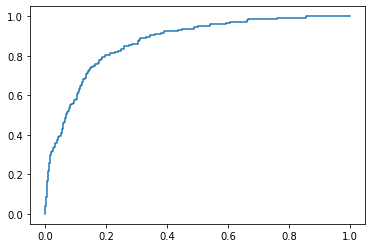

In [40]:
tpr, fpr, _ = roc_curve(y_test, prob[:,1])
plt.plot(tpr,fpr)
xgb.feature_importances_
x.columns
pd.Series( xgb.feature_importances_,x.columns).sort_values(ascending=False)

In [42]:
pd.Series( xgb.feature_importances_,x.columns).sort_values(ascending=False).head(30)

70hPa_고도4      0.014174
250hPa_고도4     0.009129
70hPa_고도3      0.008238
250hPa_풍향6     0.008165
합계 대형증발량3      0.007922
평균 해면기압3       0.007708
300hPa_기온1     0.007274
500hPa_고도1     0.007033
평균 기온7         0.006870
평균 풍속5         0.006394
400hPa_기온4     0.006341
300hPa_기온      0.006117
70hPa_이슬점5     0.005881
150hPa_이슬점5    0.005492
500hPa_이슬점2    0.005286
최대 순간풍속2       0.005166
합계 대형증발량1      0.004905
150hPa_고도3     0.004870
925hPa_풍향      0.004868
100hPa_풍속4     0.004812
최대 순간풍속4       0.004801
최대 풍속2         0.004675
70hPa_이슬점7     0.004652
100hPa_이슬점4    0.004616
70hPa_풍속       0.004613
100hPa_이슬점1    0.004446
50hPa_이슬점1     0.004361
850hPa_기온      0.004305
합계 소형증발량5      0.004263
300hPa_기온6     0.004260
dtype: float32